In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
pip list

Package                   Version
------------------------- --------------
absl-py                   2.2.2
anaconda-anon-usage       0.5.0
anyio                     4.9.0
archspec                  0.2.3
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
boltons                   23.0.0
Brotli                    1.0.9
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
conda                     24.11.1
conda-anaconda-telemetry  0.1.1
conda-content-trust       0.2.0
conda-libmamba-solver     24.9.0
conda-package-handling    2.4.0
conda_package_streaming   0.11.0
contourpy                 1.3.2
cryptography  

In [7]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [12]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [127]:
X_train[49999][31]

array([[122, 119, 114],
       [118, 116, 110],
       [120, 116, 111],
       [120, 116, 110],
       [121, 116, 108],
       [125, 120, 111],
       [120, 114, 107],
       [113, 108, 101],
       [102,  98,  92],
       [ 89,  86,  79],
       [ 87,  83,  75],
       [ 70,  67,  63],
       [ 79,  76,  69],
       [105, 101,  93],
       [106, 102,  92],
       [105, 101,  92],
       [116, 111, 105],
       [126, 122, 115],
       [126, 122, 110],
       [135, 130, 119],
       [141, 135, 125],
       [146, 141, 131],
       [151, 147, 136],
       [155, 152, 141],
       [161, 157, 147],
       [170, 167, 158],
       [178, 176, 168],
       [179, 177, 171],
       [180, 178, 174],
       [179, 177, 173],
       [164, 164, 162],
       [163, 163, 161]], dtype=uint8)

In [47]:
X_train[1][0][0]

array([154, 177, 187], dtype=uint8)

In [49]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [58]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

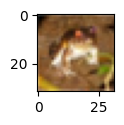

In [61]:
plot_sample(0)

In [63]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

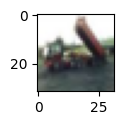

In [65]:
plot_sample(2)

In [68]:
classes[y_train[2][0]]

'truck'

In [69]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [70]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [74]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [121]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)
y_test_categorical[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [90]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="SGD",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train_scaled,y_train_categorical,epochs=50)
              

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.3007 - loss: 1.9298
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4176 - loss: 1.6509
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.4506 - loss: 1.5525
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4741 - loss: 1.4872
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.4961 - loss: 1.4346
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5079 - loss: 1.3972
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5235 - loss: 1.3542
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5373 - loss: 1.3154
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5479 - loss: 1.2832
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5589 - loss: 1.2518
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5734 - loss: 1.2203
Epoch 12

In [98]:
model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[0.12016512, 0.69926655, 0.712389  , ..., 0.00284466, 0.7901311 ,
        0.39758956],
       [0.4269683 , 0.99948967, 0.19317022, ..., 0.7728368 , 0.9999007 ,
        0.9957679 ],
       [0.9971215 , 0.9976291 , 0.06827676, ..., 0.9911449 , 0.92722964,
        0.9954551 ],
       ...,
       [0.10801817, 0.00599093, 0.9439547 , ..., 0.9842812 , 0.25125042,
        0.9351307 ],
       [0.3508558 , 0.02833667, 0.65666723, ..., 0.9529753 , 0.02897812,
        0.02022998],
       [0.08584948, 0.04997885, 0.72647905, ..., 0.99932915, 0.06782167,
        0.74690497]], dtype=float32)

In [97]:
model.predict(X_test_scaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([0.12016512, 0.69926655, 0.712389  , 0.994109  , 0.9861514 ,
       0.9512267 , 0.00223539, 0.00284466, 0.7901311 , 0.39758956],
      dtype=float32)

In [104]:
np.argmax(model.predict(X_test_scaled)[2])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


np.int64(1)

In [117]:
classes[(np.argmax(model.predict(X_test_scaled)[8]))]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


'dog'

In [118]:
classes[y_test[8][0]]

'cat'

In [122]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5173 - loss: 1.8600


[1.8501967191696167, 0.5174999833106995]

In [123]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation="relu"),
            keras.layers.Dense(1000, activation="relu"),
            keras.layers.Dense(10, activation="sigmoid")
    ])

    model.compile(optimizer="SGD",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [126]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled,y_train_categorical,epochs = 10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3090 - loss: 1.9285
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4207 - loss: 1.6467
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4555 - loss: 1.5433
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4829 - loss: 1.4833
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4927 - loss: 1.4330
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5104 - loss: 1.3904
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5245 - loss: 1.3568
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5379 - loss: 1.3118
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.5518 - loss: 1.2792
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5601 - loss: 1.2526
5min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
